[NumPy](http://www.numpy.org) je základní Python knihovna pro práci s numerickými daty, konkrétně s 1- až n-rozměrnými maticemi. Implementace (pro CPython) je z velké části napsána v C a Fortranu a používá BLAS knihovny. Numpy tak umožňuje pracovat s numerickými daty ve stylu Python kontejnerů (existují samozřejmě rozdíly) a zároveň zachovat rychlost kompilovaných jazyků.

V této lekci projdeme:
- Co je to `numpy` ndarray?
- Vytváření `numpy` polí.
- Indexování a slicing `numpy` polí.
- Co je to `numpy` array view?
- Broadcasting.
- Elementwise operace.
- Maticové operace.

Tento notebook s úctou vykrádá:  [Lectures on scientific computing with Python](http://github.com/jrjohansson/scientific-python-lectures) a [numerical_python_course](https://gitlab.com/coobas/numerical_python_course)

# Importujeme numpy

Chceme-li použít `numpy`, je samozřejmě nutné modul importovat. Obvykle se použivá zkratka `np`: 


In [1]:
import numpy as np

## Proč NumPy?

* Python seznamy jsou příliš obecné. Mohou obsahovat jakýkoliv druh objektu. Jsou dynamicky typované. Nepodporují matematické funkce, jako maticové násobení. 

* NumPy pole jsou staticky typovaná a homogenní. Typ prvků je určen při vytvoření pole.
* NumPy pole jsou efektivně uložena v paměti.
* Díky těmto vlastnostem lze implementovat matematické operace, jako je násobení nebo sčítání, v rychlém, kompilovaném jazyce (C/Fortran).

# `NumPy` pole: `ndarray`

`ndarray` je základní datový typ v `numpy`. Jedná se o n-rozměrné pole (vektor, matice, tensor) se záznamy stejného typu (typicky) čísly (integers, floats, complex numbers).

In [11]:
# numpy.ndarray
help(np.ndarray)

Help on class ndarray in module numpy:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |

In [44]:
# konstruktor můžeme použít pro vytvoření pole
# hlavní povinný parametr je shape = velikost v jednotlivých dimenzích
A = np.ndarray(shape=(2, 3, 2))
A

array([[[     93936867325119,                   0],
        [                  0,                   0],
        [       450971566080, 3919319389697488952]],

       [[4135484463250891362, 3832902367912813622],
        [4134925893392021862, 3702911303522005047],
        [3991142964674179896, 7365466084238373990]]])

Toto ale není běžný způsob, jakým bychom si `numpy` pole vytvářeli. Většinou budeme chtít pole s nějakými konkétními hodnotami. Zde se pouze alokovala paměť ale její hodnota není definována = je taková jaké bity byly na daném místě v paměti předtím.


## Vlastnosti `ndarray`

`ndarray` má mnoho zajímavách metod a atributů. Některé z nich jsou:
- `ndarray.ndim` - počet rozměrů
- `ndarray.shape` - velikost pole v jednotlivých rozměrech
- `ndarray.size` - celkový počet prvků v poli
- `ndarray.dtype` - typ prvků v poli
- `ndarray.itemsize` - velikost jednoho prvku v bajtech
- `ndarray.nbytes` - celková velikost pole v bajtech
- `ndarray.strides` - posuny v bajtech mezi jednotlivými prvky v jednotlivých rozměrech
- `ndarray.data` - buffer obsahující samotná data
- ...


In [22]:
# seznam všech atributů a metod
dir(A)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',

In [27]:
print(A.ndim)
print(A.shape)
print(A.size)

print(A.dtype)

print(A.itemsize)
print(A.nbytes)
print(A.strides)

print(A.data)


3
(2, 3, 2)
12
float64
8
96
(48, 16, 8)


Běžně se používá pořadí prvků v paměti jako C (row-major), je možné nastavit pořadí jako Fortran (column-major) a to pomocí atributu `order`.

In [45]:
# vytvoření pole s jiným vnitřním pořadím
A = np.ndarray(shape=(2, 3, 2), order='F')
print(A.strides)


(8, 16, 48)


## Typy prvků v numpy poli
Obecný objekt pro reprezentaci datového typu v `numpy` je `dtype`. `dtype` je objekt, který obsahuje informace o datovém typu.

Nicméně, vetšinou nám stačí velmi jednoduchý typ jako je například `int`, `float` a v těchto případech nemusíme typ zadávat pomocí objektu `dtype`.


**Základní typy:**

Celá čísla:
- `numpy.int8` - 8-bit integer
- `numpy.int16` - 16-bit integer
- `numpy.int32` - 32-bit integer
- `numpy.int64` - 64-bit integer
- třídu `int` (bez `numpy.`) - zvolí velikost integeru podle platformy (32-bit integer na 32-bit platformě, 64-bit integer na 64-bit platformě)

Desetinná čísla:
- `numpy.float16` - 16-bit floating point
- `numpy.float32` - 32-bit floating point
- `numpy.float64` - 64-bit floating point
- `numpy.float128` - 128-bit floating point
- třída `float` (bez `numpy.`) - zvolí velikost floating point podle platformy (32-bit floating point na 32-bit platformě, 64-bit floating point na 64-bit platformě)

Komplexní čísla:
- `numpy.complex64` - 64-bit complex number
- `numpy.complex128` - 128-bit complex number
- `numpy.complex256` - 256-bit complex number
- třídu `complex` (bez `numpy.`) - zvolí velikost complex number podle platformy (64-bit complex number na 32-bit platformě, 128-bit complex number na 64-bit platformě)

In [55]:
A = np.ndarray(shape=(1), dtype=np.int8)
print(A)
print(A.itemsize)
print("---")
A = np.ndarray(shape=(1), dtype=np.int16)
print(A)
print(A.itemsize)
print("---")
A = np.ndarray(shape=(1), dtype=np.int32)
print(A)
print(A.itemsize)
print("---")
A = np.ndarray(shape=(1), dtype=np.int64)
print(A)
print(A.itemsize)
print("---")
A = np.ndarray(shape=(1), dtype=int)
print(A)
print(A.itemsize)

[0]
1
---
[1024]
2
---
[-1458831564]
4
---
[0]
8
---
[0]
8


In [66]:
A = np.ndarray(shape=(1), dtype=np.float16)
print(A)
print(A.itemsize)
print("---")
A = np.ndarray(shape=(1), dtype=np.float32)
print(A)
print(A.itemsize)
print("---")
A = np.ndarray(shape=(1), dtype=np.float64)
print(A)
print(A.itemsize)
print("---")
A = np.ndarray(shape=(1), dtype=np.float128)
print(A)
print(A.itemsize)
print("---")
A = np.ndarray(shape=(1), dtype=float)
print(A)
print(A.itemsize)

[6.104e-05]
2
---
[-3.1085554e-14]
4
---
[0.0001]
8
---
[1.]
16
---
[0.]
8


In [68]:
A = np.ndarray(shape=(1), dtype=np.complex64)
print(A)
print(A.itemsize)
print("---")
A = np.ndarray(shape=(1), dtype=np.complex128)
print(A)
print(A.itemsize)
print("---")
A = np.ndarray(shape=(1), dtype=np.complex256)
print(A)
print(A.itemsize)
print("---")
A = np.ndarray(shape=(1), dtype=complex)
print(A)
print(A.itemsize)

[1540097.4+4.5912e-41j]
8
---
[3.5e-323+6.95256813e-310j]
16
---
[nan+nanj]
32
---
[3.5e-323+6.95256813e-310j]
16


**Komplikovanější typy:**

Je jich mnoho, může se hodit například
- `numpy.datetime64` - datetime64

Pokročilejší typy definujeme pomocí objektu `dtype`. Více viz [dokumentace 1](https://numpy.org/doc/stable/reference/generated/numpy.dtype.html) a [dokumentace 2](https://numpy.org/doc/stable/reference/arrays.dtypes.html).

In [74]:
A = np.array(['2007-07-13', '2006-01-13', '2010-08-13'], dtype=np.datetime64)
print(A)
print(A.itemsize)
print(A.dtype)

['2007-07-13' '2006-01-13' '2010-08-13']
8
datetime64[D]


Komplikovanější typy definujeme pomocí objektu `dtype`. Například pro ukázku:

```python 
my_dt = np.dtype([('název prvního sloupce', 'i4'), ('název druhého sloupce', 'f8'), ('název třetího sloupce', 'S5')])
```

Argumentem funkce np.dtype je seznam n-tic, kde každá n-tice reprezentuje "sloupec" v poli NumPy. V tomto příkladu máme tři sloupce.

První prvek každé n-tice je název sloupce a druhý prvek je řetězec, který reprezentuje datový typ pro tento sloupec. V tomto příkladu máme:

`np.int32` neboli `'i4'`: datový typ celého čísla o velikosti 4 bytů
`np.float64` neboli `'f8'`: datový typ s pohyblivou řádovou čárkou o velikosti 8 bytů
`np.string_, 5` neboli `'S5'`: datový typ řetězce s maximální délkou 5 bytů

In [94]:
# ukazka, kde prvkem je trojice integer, float, string s delkou 5
my_dt = np.dtype([('sloupec s číslem', np.int32), 
                  ('sloupec s floatem', np.float64), 
                  ('sloupec s pěti znaky', np.string_, 5)])

# vytvoříme 2x2 matici se záznami daného typu
A = np.array([[(1, 2.0, "hello"), (3, 4.0, "world")], 
              [(5, 6.0, "numpy"), (5, 6.0, "numpy")]], dtype=my_dt)


print(A.itemsize)
print(A[0, 0])
print(A['sloupec s pěti znaky'])


17
(1, 2., b'hello')
[[b'hello' b'world']
 [b'numpy' b'numpy']]


In [97]:
A[0, 0] = (10, 20.0, "hello world")
print(A[0, 0])


(10, 20., b'hello')


## Vytváření numpy polí
Existuje několik základních způsobů, jak vytvořit nové numpy pole:

- Z nějakého kontejneru typu seznam (`list`) nebo `tuple`.
    - např. `np.array([1, 2, 3])`
- Pomocí funkce numpy, která generuje `ndarray` s konkrétními hodnotami
    - např. `np.zeros((2, 3))` vytvoří pole o velikosti 2x3, kde jsou všechny prvky rovny 0
    - např. `np.ones((2, 3))` vytvoří pole o velikosti 2x3, kde jsou všechny prvky rovny 1
    - např. `np.full((2, 3), 5)` vytvoří pole o velikosti 2x3, kde jsou všechny prvky rovny 5
    - např. `np.arange(10)` vytvoří pole o velikosti 10, kde jsou všechny prvky rovny 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
    - např. `np.linspace(0, 1, 5)` vytvoří pole o velikosti 5, kde jsou všechny prvky rovny 0, 0.25, 0.5, 0.75, 1
    - např. `np.random.random((2, 3))` vytvoří pole o velikosti 2x3, kde jsou všechny prvky rovny náhodným číslům z intervalu [0, 1)
    - např. `np.random.normal(0, 1, (2, 3))` vytvoří pole o velikosti 2x3, kde jsou všechny prvky rovny náhodným číslům z normálního rozdělení s průměrem 0 a směrodatnou odchylkou 1
    - např. `np.random.randint(0, 10, (2, 3))` vytvoří pole o velikosti 2x3, kde jsou všechny prvky rovny náhodným celým číslům z intervalu [0, 10)
- Načtením ze souboru
    - např. `np.loadtxt('filename.txt')` načte pole ze souboru `filename.txt`
    - např. `np.genfromtxt('filename.txt', delimiter=',')` načte pole ze souboru `filename.txt` s oddělovačem čárka
- Z jiného numpy pole
    - např. pomocí výběru (slicing), pozor na to, že se vytvoří nové pole, které sdílí data s původním polem (view)

### Vytváření numpy polí z python kontejnerů

In [102]:
muj_list = [1, 2, 3, 4, 5]
A = np.array(muj_list)
print(A)
print(A.dtype)

[1 2 3 4 5]
int64


Vícerozměrné pole (matice) se vytvoří z vnořeného seznamu.

In [4]:
matrix = np.array([[1, 2], [3, 4]])
matrix

array([[1, 2],
       [3, 4]])

In [103]:
muj_touple = (1, 2, 3, 4, 5)
A = np.array(muj_touple)
print(A)
print(A.dtype)

[1 2 3 4 5]
int64


Ze `set` a `dict` se vytvoří něco jiného než bychom asi očekávali.

In [111]:
muj_set = {1, 2, 3, 4, 5}
A = np.array(muj_set)
print(A)
print(type(A))
print(A.dtype)
print(A.shape)
print(A.size)
print(A.ndim)
print(A.itemsize)

{1, 2, 3, 4, 5}
<class 'numpy.ndarray'>
object
()
1
0
8


In [115]:
muj_dict = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}
A = np.array(muj_dict)
print(A)
print(type(A))
print(A.dtype)
print(A.shape)
print(A.size)
print(A.ndim)
print(A.itemsize)


{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}
<class 'numpy.ndarray'>
object
()
1
0
8


## Pomocné generátory polí
Zejména velká pole by bylo nepraktické inicializovat pomocí seznamů. Naštěstí v numpy existují [funkce](http://docs.scipy.org/doc/numpy/reference/routines.array-creation.html), které generují typická pole.

**`arange`** vygeneruje posloupnost, syntaxe je stejná jako `range`

In [14]:
np.arange(0, 10, 1)  # argumenty: start, stop, step

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
np.arange(-1, 0, 0.1)

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1])

**`linspace`** a **`logspace`** vytváří posloupnosti s daným počtem prvků.

In [21]:
# první a poslední prvek jsou obsaženy ve výsledku
np.linspace(0, 10, 5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [20]:
np.logspace(0, 10, 11, base=10)

array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07,
       1.e+08, 1.e+09, 1.e+10])

**`ones`** a **`zeros`** vytvoří pole ze samých nul nebo jedniček.

In [22]:
np.ones(3)

array([1., 1., 1.])

In [23]:
# pokud chceme 2 a více rozměrů, musíme zadat rozměr jako tuple
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

**`mgrid`** tvoří pravidelnou mříž.

In [24]:
# všimněte si syntaxe s hranatými závorkami, mgrid se nevolá jako funkce
x, y = np.mgrid[0:2, 0:3]
print(f"x = \n{x}")
print(f"y = \n{y}")

x = 
[[0 0 0]
 [1 1 1]]
y = 
[[0 1 2]
 [0 1 2]]


Náhodná data vytvoří funkce **`random_sample`** a další z modulu **`random`**.

In [27]:
# několik náhodných čísel [0, 1] s rovnoměrným rozdělením
np.random.random_sample(4)

array([0.24322835, 0.62911947, 0.90406833, 0.4815721 ])

In [29]:
# matice s náhodnými čísly z normálním rozdělením
np.random.standard_normal((4, 4))

array([[-1.33032936, -0.17332339,  1.18480304, -0.77883461],
       [-0.86913537,  0.92142974, -0.01103739, -1.88087039],
       [-1.60771105,  0.12901739, -0.51094771, -1.72278949],
       [ 0.62140584, -0.45699894,  0.40971992,  2.09084116]])

**`diagflat`** vytvoří diagonální matici, **`diagonal`** vrátí diagonálu matice.

In [35]:
# diagonální matice
diag = np.diagflat([1, 2, 3])
diag

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [36]:
# vrátí diagonálu jako vektor
np.diagonal(diag)

array([1, 2, 3])

### Cvičení

1. Vytvořte pole 3x4 typu `bool` se všemi prvky `True`.
2. Vytvořte matici 5x5 kde jediné nenulová prvky jsou [1, 2, 3, 4] pod hlavní diagonálou (nápověda - podívejte se na nápovědu funkce `diagflat`).
```
0 0 0 0 0
1 0 0 0 0
0 2 0 0 0
0 0 3 0 0 
0 0 0 4 0
```

## Práce se soubory

### ASCII soubory
S textovými (ASCII) soubory obsahující data se setkáváme stále často, přestože to z mnoha důvodů není ideální formát. Na čtení ASCII (spadá sem i CSV) máme v Numpy `genfromtxt` a `loadtxt`. V [dokumentaci](http://docs.scipy.org/doc/numpy/reference/routines.io.html) se dozvíte, jak přesně fungují a jaké mají argumenty.

Pomocí `%%file` vytvoříme soubor `ascii_data_1.txt`

In [46]:
%%file ascii_data_1.txt
 1    -6.1    -6.1    -6.1 1
 2   -15.4   -15.4   -15.4 1
 3   -15.0   -15.0   -15.0 1
 4   -19.3   -19.3   -19.3 1
 5   -16.8   -16.8   -16.8 1
 6   -11.4   -11.4   -11.4 1
 7    -7.6    -7.6    -7.6 1
 8    -7.1    -7.1    -7.1 1
 9   -10.1   -10.1   -10.1 1
10    -9.5    -9.5    -9.5 1

Overwriting ascii_data_1.txt


Nyní se pokusíme soubor načíst pomocí `genfromtxt`.

In [47]:
data = np.genfromtxt('ascii_data_1.txt')
print(data)

[[  1.   -6.1  -6.1  -6.1   1. ]
 [  2.  -15.4 -15.4 -15.4   1. ]
 [  3.  -15.  -15.  -15.    1. ]
 [  4.  -19.3 -19.3 -19.3   1. ]
 [  5.  -16.8 -16.8 -16.8   1. ]
 [  6.  -11.4 -11.4 -11.4   1. ]
 [  7.   -7.6  -7.6  -7.6   1. ]
 [  8.   -7.1  -7.1  -7.1   1. ]
 [  9.  -10.1 -10.1 -10.1   1. ]
 [ 10.   -9.5  -9.5  -9.5   1. ]]


`loadtxt` by mělo fungovat také:

In [49]:
np.loadtxt('ascii_data_1.txt')

array([[  1. ,  -6.1,  -6.1,  -6.1,   1. ],
       [  2. , -15.4, -15.4, -15.4,   1. ],
       [  3. , -15. , -15. , -15. ,   1. ],
       [  4. , -19.3, -19.3, -19.3,   1. ],
       [  5. , -16.8, -16.8, -16.8,   1. ],
       [  6. , -11.4, -11.4, -11.4,   1. ],
       [  7. ,  -7.6,  -7.6,  -7.6,   1. ],
       [  8. ,  -7.1,  -7.1,  -7.1,   1. ],
       [  9. , -10.1, -10.1, -10.1,   1. ],
       [ 10. ,  -9.5,  -9.5,  -9.5,   1. ]])

`savetxt` můžeme použít na uložení.

In [50]:
np.savetxt("ascii_data_1_new.txt", data, fmt="%6g")

Soubor můžeme vypsat:

In [55]:
print(open("ascii_data_1_new.txt", "r").read())

     1   -6.1   -6.1   -6.1      1
     2  -15.4  -15.4  -15.4      1
     3    -15    -15    -15      1
     4  -19.3  -19.3  -19.3      1
     5  -16.8  -16.8  -16.8      1
     6  -11.4  -11.4  -11.4      1
     7   -7.6   -7.6   -7.6      1
     8   -7.1   -7.1   -7.1      1
     9  -10.1  -10.1  -10.1      1
    10   -9.5   -9.5   -9.5      1



Obecně se snažte textovým souborům (včetně csv apod.) pro numerická datavyhýbat. Jejich formát je vždy do značné míry neurčitý a na disku zabírají zbytečně moc místa. Výhodou je pouze jednoduchost zobrazení v textovém editoru nebo příkazové řadce.

### Binární formáty

Pro numerická data se daleko více hodí binární soubory, které jsou dobře definované a úsporné na místo. Pokud použijeme vhodný a rozšířený formát, nemusíme se bát ani přenositelnosti.

Numpy má vlastní NPY formát. Ten je pochopitelně jednoduchý na používání v NumPy, s přenositelností (pro stále ještě neuživatele Pythonu a obecně další systémy) je to ale už horší. Pomocí `save` a `load` můžete jednoduše ukládat a nahrávat Numpy objekty.

In [56]:
np.save("ascii_data_1_new.npy", data)

In [57]:
np.load("ascii_data_1_new.npy")

array([[  1. ,  -6.1,  -6.1,  -6.1,   1. ],
       [  2. , -15.4, -15.4, -15.4,   1. ],
       [  3. , -15. , -15. , -15. ,   1. ],
       [  4. , -19.3, -19.3, -19.3,   1. ],
       [  5. , -16.8, -16.8, -16.8,   1. ],
       [  6. , -11.4, -11.4, -11.4,   1. ],
       [  7. ,  -7.6,  -7.6,  -7.6,   1. ],
       [  8. ,  -7.1,  -7.1,  -7.1,   1. ],
       [  9. , -10.1, -10.1, -10.1,   1. ],
       [ 10. ,  -9.5,  -9.5,  -9.5,   1. ]])

Velice dobrým a rozšířeným standardem je pak [HDF5](https://www.hdfgroup.org/solutions/hdf5/). Pro Python je jednoduché tento foromát používat pomocí knihovny [h5py](https://www.h5py.org/).

In [61]:
# pokud nemáte h5py nainstalované, můžete jednoduše nainstalovat přímo z notebooku momocí
# %conda install h5py
# nebo pokud používáte pip prostředí
# %pip install h5py

In [62]:
import h5py

V HDF5 souborech jsou data ve stromové struktuře (obdoba aresářů a souborů). Soubor se dvěma datasety můžeme vytvořit např. takto:

In [64]:
with h5py.File("test_hdf5.h5", "w") as hdf5_file:
    hdf5_file.create_dataset("data", data=data)
    hdf5_file.create_dataset("random", data=np.random.random_sample((3, 4)))

In [73]:
with h5py.File("test_hdf5.h5", "r") as hdf5_file:
    # musíme data "nahrát" pomocí [:], jinak by byl výsledek jen "ukazatel" na data
    data_hdf5 = hdf5_file["data"][:]

In [74]:
data_hdf5

array([[  1. ,  -6.1,  -6.1,  -6.1,   1. ],
       [  2. , -15.4, -15.4, -15.4,   1. ],
       [  3. , -15. , -15. , -15. ,   1. ],
       [  4. , -19.3, -19.3, -19.3,   1. ],
       [  5. , -16.8, -16.8, -16.8,   1. ],
       [  6. , -11.4, -11.4, -11.4,   1. ],
       [  7. ,  -7.6,  -7.6,  -7.6,   1. ],
       [  8. ,  -7.1,  -7.1,  -7.1,   1. ],
       [  9. , -10.1, -10.1, -10.1,   1. ],
       [ 10. ,  -9.5,  -9.5,  -9.5,   1. ]])

Jelikož v HDF5 souboru může být velké množství dat (mnoho datasetů, velká data), je čtení dat z HDF5 "lazy": Dokud data opravdu nepotřebujeme v paměti (např. v NumPy poli), data zůstávají jen v souboru a v paměti máme jen jejich popis, jakýsi ukazatel na data.

To můžete vyzkoušet vymazáním `[:]` z načítání data v předchozí ukázce.

## Práce s NumPy poli

### Indexování a řezání

In [75]:
vector = np.linspace(0, 3, 7)
vector

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ])

Numpy pole můžeme indexovat podobně jako list.

První prvek vektoru:

In [76]:
vector[0]

0.0

In [77]:
matrix = np.array([[1, 2], [3, 4]], dtype=int)
matrix

array([[1, 2],
       [3, 4]])

Pro matice můžeme použít rozšířeného indexování - více argumentů pro řez:

In [78]:
matrix[1, 1]

4

Pokud jeden index vynecháme, vrátí numpy N-1 rozměrný řez.

In [79]:
matrix[1]

array([3, 4])

Toho samého docílíme pomocí `:`

In [81]:
matrix[1, :]

array([3, 4])

První sloupec:

In [82]:
matrix[:, 1]

array([2, 4])

Můžeme také přiřazovat honoty do indexovaných polí.

In [83]:
matrix[0, 0] = -10
print(matrix)

[[-10   2]
 [  3   4]]


Funguje to i pro více prvků:

In [86]:
matrix[1, :] = 0
print(matrix)

[[-10   2]
 [  0   0]]


Řezy mají stejnou syntaxi jako pro seznamy (řezy jsou ostatně koncept Pythonu jako takového). Pro připomenutí, tato syntaxe je `[dolní_mez : horní_mez : krok]`.

In [87]:
my_array = np.arange(1, 10)
my_array

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

Jednoduchý řez s krokem 1:

In [90]:
my_array[1:3]

array([2, 3])

Řez s krokem 2

In [94]:
my_array[:-2:2]

array([1, 3, 5, 7])

**Řezy jsou mutable**: pokud do nich něco přiřadíme, projeví se to na původním objektu.

In [95]:
my_array[1:3] = [-2, -3]
my_array

array([ 1, -2, -3,  4,  5,  6,  7,  8,  9])

Řezy fungují i pro vícerozměrné matice.

In [96]:
my_array = np.array([[n + m * 10 for n in range(5)] for m in range(5)])
my_array

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

Část původní matice

In [97]:
my_array[3:, 1:-1]

array([[31, 32, 33],
       [41, 42, 43]])

Řez s krokem 2

In [98]:
my_array[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

### Jetě elegantnější vyřezávání
Pro řezy můžeme použít nejen čísla, ale také přímo pole. Např. pro výběr některých řádků

In [99]:
row_indices = [1, 2]
my_array[row_indices]

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

Můžeme indexovat i dvěma poli:

In [106]:
my_array[[1, 2, 3], [1, -1, 0]]

array([11, 24, 30])

Můžeme také použít **maskování**. Např. vytvoříme masku dělitelnosti 3mi.

In [107]:
mask3 = my_array % 3 == 0
print(mask3)

[[ True False False  True False]
 [False False  True False False]
 [False  True False False  True]
 [ True False False  True False]
 [False False  True False False]]


Tuto masku pak můžeme použít pro vytvoření řezu.

In [108]:
my_array[mask3]

array([ 0,  3, 12, 21, 24, 30, 33, 42])

### Cvičení

1. Z pole 8x8 samých nul vyvořte pomocí řezů co nejelegantnějším způsobem 8x8 matici, která vypadá jako šachovnice.
```
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
```
2. Pomocí `np.random.randint` vytvořte vektor dvouciferných kladných celých čísel. Poté pomocí indexu typu masky nahraďte liché hodnoty jejich opačnou hodnotou. Např. [11, 20, 42, 33] -> [-11, 20, 42, -33].

## Lineární algebra
Numpy dokáže velice obratně a efektivně pracovat s vektory, maticemi a n-dimenzionálními poli obecně. Toho je potřeba využívat a kdekoli to je možné použít *vektorizovaný kód*, tj. co nejvíce formulovat úlohy pomocí vektorových a maticových operací, jako jsou např. násobení matic.

### Operace se skaláry
Jak bychom asi očekávali, skalárem můžeme násobit, dělit, můžeme ho přičítat nebo odečítat.

In [125]:
v1 = np.arange(0, 5)

In [126]:
v1 * 2

array([0, 2, 4, 6, 8])

In [127]:
v1 + 2

array([2, 3, 4, 5, 6])

In [128]:
np.ones((3, 3)) / 4

array([[0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25]])

## Maticové operace po prvcích
Operace jako násobení, sčítání atd. jsou v numpy stardadně *po prvcích*, není to tedy klasická maticová (vektorová) algebra.

In [129]:
m1 = np.array([[n + m * 10 for n in range(5)] for m in range(5)])
m1

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [130]:
m1 * m1

array([[   0,    1,    4,    9,   16],
       [ 100,  121,  144,  169,  196],
       [ 400,  441,  484,  529,  576],
       [ 900,  961, 1024, 1089, 1156],
       [1600, 1681, 1764, 1849, 1936]])

In [131]:
v1 * v1

array([ 0,  1,  4,  9, 16])

Pokud se dají pole rozšířit na společný rozměr, numpy to za nás udělá.

In [132]:
v1.shape, m1.shape

((5,), (5, 5))

Výsledek bude mít rozměr `m1.shape`

In [133]:
m1 * v1

array([[  0,   1,   4,   9,  16],
       [  0,  11,  24,  39,  56],
       [  0,  21,  44,  69,  96],
       [  0,  31,  64,  99, 136],
       [  0,  41,  84, 129, 176]])

## Maticová algebra
Klasickou maticovou algebru zajišťuje pro pole typu `ndarray` funkce `dot` nebo operátor `@` ([PEP-465](https://www.python.org/dev/peps/pep-0465/)):

In [134]:
# maticové násobení dvou matic
np.dot(m1, m1)

array([[ 300,  310,  320,  330,  340],
       [1300, 1360, 1420, 1480, 1540],
       [2300, 2410, 2520, 2630, 2740],
       [3300, 3460, 3620, 3780, 3940],
       [4300, 4510, 4720, 4930, 5140]])

In [135]:
m1 @ m1

array([[ 300,  310,  320,  330,  340],
       [1300, 1360, 1420, 1480, 1540],
       [2300, 2410, 2520, 2630, 2740],
       [3300, 3460, 3620, 3780, 3940],
       [4300, 4510, 4720, 4930, 5140]])

In [136]:
# maticové násobení vektoru a matice
np.dot(m1, v1)

array([ 30, 130, 230, 330, 430])

In [137]:
# skalární součin
v1 @ v1

30

## Transformace
Už jsme viděli `.T` pro transponování. Existuje také funkce a metoda `transpose`. Dále existuje třeba `conjugate` pro komplexní sdružení.

In [159]:
C = np.array([[1j, 2j], [3j, 4j]])
C

array([[0.+1.j, 0.+2.j],
       [0.+3.j, 0.+4.j]])

In [160]:
np.conjugate(C)      # nebo C.conjugate()

array([[0.-1.j, 0.-2.j],
       [0.-3.j, 0.-4.j]])

In [162]:
# Hermitovské sdružení
C.conjugate().T

array([[0.-1.j, 0.-3.j],
       [0.-2.j, 0.-4.j]])

Reálnou a imaginární část dostaneme pomocí `real` a `imag` nebo `.real` a `.imag` properties:

In [163]:
np.real(C)

array([[0., 0.],
       [0., 0.]])

In [164]:
C.imag

array([[1., 2.],
       [3., 4.]])

Komplexní číslo rozložíme na absolutní hodnotu a úhel pomocí `abs` a `angle`.

In [165]:
np.angle(C+1)

array([[0.78539816, 1.10714872],
       [1.24904577, 1.32581766]])

In [166]:
np.abs(C+1)

array([[1.41421356, 2.23606798],
       [3.16227766, 4.12310563]])

### Cvičení

1. Ověřte empiricky na náhodné matici, že platí $(AB)^T = B^T A^T$


## Základní funkce lineární algebry

V Numpy existuje modul `linalg`. Pokročilejší lineární algebru je ale třeba hledat jinde, např. ve SciPy. 

Invertovat matici můžeme pomocí `linalg.inv`.

In [152]:
m2 = np.array([[1., 1.5], [-1, 2]])
m2

array([[ 1. ,  1.5],
       [-1. ,  2. ]])

In [169]:
np.linalg.inv(m2)

array([[ 0.57142857, -0.42857143],
       [ 0.28571429,  0.28571429]])

In [172]:
# toto by měla být jednotková matice
np.linalg.inv(m2) @ m2

array([[1., 0.],
       [0., 1.]])

`linalg.det` vypočítá determinant.

In [174]:
np.linalg.det(m2)

3.5

## Zpracování dat

Numpy je vhodné pro práci se soubory dat, pro které poskytuje řadu funkcí, např. statistických.

Zkusme nějakou statistiku na souboru teplot ve Stockholmu. Data si můžete stáhnout z [Gitlabu](https://gitlab.com/coobas/numerical_python_course/-/raw/dda96848bd96e0d1f0e06b2639f48c7f464f8bb1/lecture_notes.cz/data/stockholm_td_adj.dat?inline=false).

In [185]:
data = np.genfromtxt('data/stockholm_td_adj.dat')
np.shape(data)

(77431, 7)

In [183]:
data[:2, :]

array([[ 1.80e+03,  1.00e+00,  1.00e+00, -6.10e+00, -6.10e+00, -6.10e+00,
         1.00e+00],
       [ 1.80e+03,  1.00e+00,  2.00e+00, -1.54e+01, -1.54e+01, -1.54e+01,
         1.00e+00]])

#### mean (aritmetický průměr)

In [176]:
# the temperature data is in column 3
print(
    "The daily mean temperature in Stockholm over the last 200 year so has been about {:.1f} °C.".format(
        np.mean(data[:, 3])
    )
)

The daily mean temperature in Stockholm over the last 200 year so has been about 6.2 °C.


#### směrodatná odchylka a variance

In [179]:
np.std(data[:, 3]), np.var(data[:, 3])

(8.282271621340573, 68.59602320966341)

#### min a max

In [180]:
# nejnižší denní teplota
data[:, 3].min()

-25.8

In [181]:
# nejvyšší denní teplota
data[:, 3].max()

28.3

#### sum, prod, trace

In [81]:
d = np.arange(1, 11)
d

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [82]:
# sečíst všechny prvky
np.sum(d)

55

In [83]:
# násobek všech prvků
np.prod(d)

3628800

In [84]:
# kumulativní součet
np.cumsum(d)

array([ 1,  3,  6, 10, 15, 21, 28, 36, 45, 55])

In [85]:
# kumulativní násobení
np.cumprod(d)

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800])

In [86]:
# stejné jako diag(m1).sum()
np.trace(m1)

110

## Výpočty s částmi polí

Výpočty můžeme také provádět na podmnožinách dat pomocí indexování (jednoduchého či pokročilého) a dalších metod ukázaných níže.

Vraťme se k údajům o teplotě.

In [87]:
data[1]

array([ 1.80e+03,  1.00e+00,  2.00e+00, -1.54e+01, -1.54e+01, -1.54e+01,
        1.00e+00])

Format je: rok, měsíc, den, průměrná teplota, nejnižší teplota, nejvyšší teplota, poloha.

Pokud chceme spočítat průměrnou teplotu v konkrétním měsíci, např únoru, můžeme použít *maskování*.


In [88]:
np.unique(data[:, 1]) # měsíce mají hodnoty 1 - 12

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [89]:
# vytvoříme masku
mask_feb = data[:, 1] == 2

In [90]:
# masku použijeme jako index
print(u"Průměrná únorová teplota je {:.1f} °C".format(np.mean(data[mask_feb, 3])))

Průměrná únorová teplota je -3.2 °C


Získání průměrných teplot pro všechny měsíce je také jednoduché.


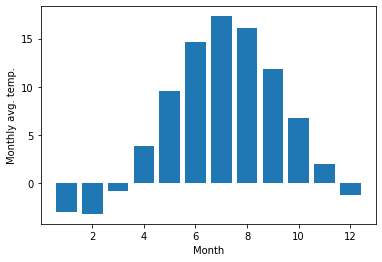

In [91]:
months = np.arange(1,13)
monthly_mean = [np.mean(data[data[:, 1] == month, 3]) for month in months]

# teď používáme matplotlib, se kterým se naučíme příště :)
fig, ax = plt.subplots()
ax.bar(months, monthly_mean)
ax.set_xlabel("Month")
ax.set_ylabel("Monthly avg. temp.");

### Výpočty s vícerozměrnými daty

Pokud je funkce jako `min`, `max` apod. použita na vícerozměrné pole, je někdy účelem ji aplikovat na celé pole, jindy zase po řádcích nebo sloupcích. K tomuto účelu slouží argument `axis`.

In [186]:
m = np.random.rand(3, 4)
m

array([[0.01634568, 0.83311498, 0.47349707, 0.47323059],
       [0.19986406, 0.09789846, 0.98967341, 0.03272229],
       [0.47602455, 0.02792878, 0.61671612, 0.37006065]])

In [187]:
# globální max
m.max()

0.9896734088817986

In [188]:
# max pro každý sloupec
m.max(axis=0)

array([0.47602455, 0.83311498, 0.98967341, 0.47323059])

In [189]:
# max pro každý řádek
m.max(axis=1)

array([0.83311498, 0.98967341, 0.61671612])

Argument `axis` používá mnoho dalších funkcí z numpy.

## Změny rozměrů a spojování polí

Rozměr Numpy polí může být měněn bez kopírování samotných dat, což výrazně tyto operace zrychluje.

In [190]:
m1

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [191]:
n, m = m1.shape

Např. takto můžeme vytvořit jednorozměrné pole

In [192]:
m1.reshape((1, n*m))

array([[ 0,  1,  2,  3,  4, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30,
        31, 32, 33, 34, 40, 41, 42, 43, 44]])

Nebo použít -1 pro automatické dopočítání

In [193]:
m1.reshape((1, -1))

array([[ 0,  1,  2,  3,  4, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30,
        31, 32, 33, 34, 40, 41, 42, 43, 44]])

Ovšem pozor: jelikož data jsou společná, změna v novém poli se projeví i v původním! Numpy to nazývá *views* - pohledy.

In [194]:
m2 = m1.reshape((1, -1))

In [195]:
m2[0, 0:5] = 5 # modify the array
m2

array([[ 5,  5,  5,  5,  5, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30,
        31, 32, 33, 34, 40, 41, 42, 43, 44]])

Změny se projeví i v původním `m1`

In [196]:
m1

array([[ 5,  5,  5,  5,  5],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

Funkce `flatten` vytvoří jednorozměrné pole (vektor), data jsou v tomto případě kopírována.

In [197]:
m1.flatten()

array([ 5,  5,  5,  5,  5, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
       32, 33, 34, 40, 41, 42, 43, 44])

### Přidávání dimenzí: `newaxis`

Pomocí `newaxis` můžeme jednoduše pomocí řezů přidávat dimenze. Např. převod 1d vektoru na sloupcovou nebo řádkovou matici.

In [198]:
v = np.array([1, 2, 3])
v.shape

(3,)

In [199]:
# vytvoříme sloupec
vc = v[:, np.newaxis]
vc

array([[1],
       [2],
       [3]])

In [200]:
vc.shape

(3, 1)

In [201]:
# řádek
v[np.newaxis, :].shape

(1, 3)

### Spojování a opakování

Na spojování a opakování máme funkce `repeat`, `tile`, `vstack`, `hstack` a `concatenate`.

In [202]:
a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

In [203]:
# opakování po prvcích
np.repeat(a, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [204]:
# skládání celých polí 
np.tile(a, (3, 2))

array([[1, 2, 1, 2],
       [3, 4, 3, 4],
       [1, 2, 1, 2],
       [3, 4, 3, 4],
       [1, 2, 1, 2],
       [3, 4, 3, 4]])

`concatenate` spojí dvě pole

In [205]:
b = np.array([[5, 6]])

In [206]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [207]:
# musíme použít b.T
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

`hstack` a `vstack` skládá pole horizontáleně nebo vertikálně

In [208]:
np.vstack((a, b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [209]:
np.hstack((a, b.T))

array([[1, 2, 5],
       [3, 4, 6]])

### Cvičení
1. Pro náhodné 1D vektory $u, v$ vypočítejte dyadický součin $uv$ ($uv_{ij} = u_iv_j$) pomocí `newaxis`.
2. Vytvořte šachovnicovou matici pomocí `tile`.

## Kopírování dat

Python obecně přiřazuje proměnné pomocí referencí. Numpy objekty nejsou výjimkou.

In [218]:
A = np.array([[1, 2], [3, 4]])
A

array([[1, 2],
       [3, 4]])

In [219]:
# B je teď identický objekt s A
B = A 

In [220]:
# změna v B se projeví v A
B[0, 0] = 10
A

array([[10,  2],
       [ 3,  4]])

Pokud chceme data zkopírovat, tj. pokud bychom chtěli aby `A` bylo nezávislé na `B`, můžeme použít metodu nebo funci `copy`.

In [221]:
B = A.copy()
# nebo B = np.copy(A)

In [222]:
# změny v B už se neprojeví v A
B[0, 0] = -5
A

array([[10,  2],
       [ 3,  4]])

## Iterace

Obecně se iteraci vyhýbáme a přednost dáváme vektorovým operacím (viz níže). Někdy je ale iterace nevyhnutelná.

In [223]:
v = np.array([1, 2, 3, 4])

for element in v:
    print(element)

1
2
3
4


Iteruje se přes první index (po řádcích).

In [224]:
M = np.array([[1, 2], [3, 4]])

for row in M:
    print("row: {}".format(row))


row: [1 2]
row: [3 4]


Pokud potřebujeme také indexy, použijeme `enumerate`. (Vzpomínáte?)

In [225]:
for row_idx, row in enumerate(M):
    print("row_idx", row_idx, "row", row)
    
    for col_idx, element in enumerate(row):
        print("col_idx", col_idx, "element", element)
       
        # update the matrix M: square each element
        M[row_idx, col_idx] = element ** 2

row_idx 0 row [1 2]
col_idx 0 element 1
col_idx 1 element 2
row_idx 1 row [3 4]
col_idx 0 element 3
col_idx 1 element 4


In [226]:
# each element in M is now squared
M

array([[ 1,  4],
       [ 9, 16]])

## Vektorové funkce

Jak jsme již říkali, vektorové (vektorizované) funkce jsou obecně daleko rychlejší než iterace. Numpy nám naštěstí cestu od skalární po vektorovou funkci usnadňuje.

In [235]:
def Theta(x):
    """
    Scalar implemenation of the Heaviside step function.
    """
    if x >= 0:
        return 1
    else:
        return 0

In [236]:
# toto bychom chtěli, ale asi to nebude fungovat
Theta(np.array([-3, -2, -1, 0, 1, 2, 3]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Pro vektorizaci naší funkce nám Numpy nabízí `vectorize`.

In [237]:
Theta_vec = np.vectorize(Theta)

In [238]:
Theta_vec(np.array([-3, -2, -1, 0, 1, 2, 3]))

array([0, 0, 0, 1, 1, 1, 1])

To bylo celkem snadné ... Můžeme také (a pokud to jde tak bychom měli) přepsat naší funkci tak, aby fungovala jak pro skaláry tak pro pole.

In [239]:
def Theta_numpy(x):
    """
    Vector-aware implemenation of the Heaviside step function.
    """
    return 1 * (x >= 0)

In [240]:
Theta_numpy(np.array([-3, -2, -1, 0, 1, 2, 3]))

array([0, 0, 0, 1, 1, 1, 1])

In [241]:
# funguje i pro skalár
Theta_numpy(-1.2), Theta_numpy(2.6)

(0, 1)

Pojďme zkusit porovna rychlost vektorizovaných funkcí. Tipnete si jaká bude rychléjší, případně jak moc rychlejší?

In [242]:
randvec = np.random.random_sample((10000)) * 2000 - 1000

In [ ]:
%timeit Theta_vec(randvec)

In [ ]:
%timeit Theta_numpy(randvec)

## Používání polí v podmínkách
Pokud chceme testovat po prvcí, v podmínkách pak použijeme metody `all` nebo `any`.

In [132]:
M

array([[ 1,  4],
       [ 9, 16]])

In [133]:
# výsledkem M > 5 je pole boolovských hodnot
M > 5

array([[False, False],
       [ True,  True]])

In [134]:
if (M > 5).any():
    print("M obsahuje alespoň jeden prvek větší než 5")
else:
    print("M neobsahuje žádný prvek větší než 5")

M obsahuje alespoň jeden prvek větší než 5


In [135]:
if (M > 5).all():
    print("všechny prvky v M jsou větší než 5")
else:
    print("M obsahuje alespoň jeden prvek menší rovno 5")

M obsahuje alespoň jeden prvek menší rovno 5


## Změna typů
Numpy pole jsou *staticky typované*. Pro změnu typu můžeme použít metodu `astype` (případně `asarray`).

In [245]:
M.dtype

dtype('int64')

In [246]:
M2 = M.astype(float)
M2

array([[ 1.,  4.],
       [ 9., 16.]])

In [247]:
M2.dtype

dtype('float64')

In [248]:
M3 = M.astype(bool)
M3

array([[ True,  True],
       [ True,  True]])

## Další čtení

* https://numpy.org/
* https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html
* http://www.labri.fr/perso/nrougier/teaching/numpy.100/index.html